<a href="https://colab.research.google.com/github/RubenMcCarty/Master-BigData-DataScience/blob/main/UNI_Aprendiendo_Reinforcement_Learning_con_AWS_01_Introducci%C3%B3n_a_Q_Learning_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip3 install gym
!pip3 install numpy

In [ ]:
import numpy as np
import gym

# Crear el entorno FrozenLake
env = gym.make('FrozenLake-v1')

# Inicializar la tabla Q con ceros
Q = np.zeros([env.observation_space.n, env.action_space.n])

# Parámetros del algoritmo
learning_rate = 0.8
discount_factor = 0.95
num_episodes = 2000
epsilon = 0.2  # Probabilidad de exploración

# Función para elegir la acción utilizando epsilon-greedy
def choose_action(state):
    if np.random.rand() < epsilon:
        return env.action_space.sample()  # Exploración aleatoria
    else:
        return np.argmax(Q[state, :])  # Explotación

# Entrenamiento del agente
for episode in range(num_episodes):
    state = env.reset()
    total_reward = 0

    for _ in range(100):  # Límite de pasos por episodio
        action = choose_action(state)
        next_state, reward, done, _ = env.step(action)

        # Actualizar la tabla Q usando la ecuación de Q-learning
        Q[state, action] = (1 - learning_rate) * Q[state, action] + \
                           learning_rate * (reward + discount_factor * np.max(Q[next_state, :]))

        total_reward += reward
        state = next_state

        if done:
            break

# Imprimir la tabla Q aprendida
print("Tabla Q aprendida:")
print(Q)

# Probar el agente entrenado
state = env.reset()
total_reward = 0

for _ in range(100):
    action = np.argmax(Q[state, :])
    next_state, reward, done, _ = env.step(action)
    total_reward += reward
    state = next_state

    if done:
        break

print("Recompensa total en un episodio:", total_reward)


Tabla Q aprendida:
[[3.06592742e-01 2.30330828e-01 1.89052609e-01 1.64011139e-01]
 [3.53597505e-02 1.11929564e-01 2.68310050e-02 2.17334453e-01]
 [2.58920831e-02 3.13891545e-02 1.02888938e-01 1.07389545e-01]
 [1.08795334e-01 2.19115904e-02 2.80688785e-02 1.06396260e-01]
 [3.36231511e-01 4.80582975e-02 5.85409721e-02 2.55905178e-01]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [1.14439608e-03 3.76741099e-04 5.44698025e-04 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [1.71068752e-01 1.32776758e-01 7.42504584e-02 3.74160374e-01]
 [3.51835548e-01 4.65746696e-01 9.66711748e-02 1.22207010e-01]
 [3.46303186e-02 5.45474687e-02 1.69176149e-01 3.54710228e-05]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [3.71152999e-01 3.85873199e-01 8.44113816e-01 1.05268310e-01]
 [6.32840864e-01 9.89260119e-01 4.86736900e-01 5.92412292e-01]
 [0.00000000e+00 0.00000000e+00 0.00

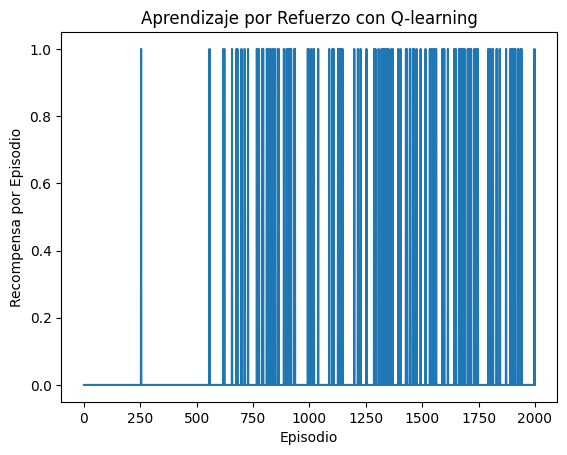

In [ ]:
import numpy as np
import gym
import matplotlib.pyplot as plt

# Crear el entorno FrozenLake
env = gym.make('FrozenLake-v1')

# Inicializar la tabla Q con ceros
Q = np.zeros([env.observation_space.n, env.action_space.n])

# Parámetros del algoritmo
learning_rate = 0.8
discount_factor = 0.95
num_episodes = 2000
epsilon = 0.2  # Probabilidad de exploración

# Listas para almacenar las recompensas por episodio
rewards_per_episode = []

# Función para elegir la acción utilizando epsilon-greedy
def choose_action(state):
    if np.random.rand() < epsilon:
        return env.action_space.sample()  # Exploración aleatoria
    else:
        return np.argmax(Q[state, :])  # Explotación

# Entrenamiento del agente y seguimiento de recompensas
for episode in range(num_episodes):
    state = env.reset()
    total_reward = 0

    for _ in range(100):  # Límite de pasos por episodio
        action = choose_action(state)
        next_state, reward, done, _ = env.step(action)

        # Actualizar la tabla Q usando la ecuación de Q-learning
        Q[state, action] = (1 - learning_rate) * Q[state, action] + \
                           learning_rate * (reward + discount_factor * np.max(Q[next_state, :]))

        total_reward += reward
        state = next_state

        if done:
            break

    rewards_per_episode.append(total_reward)

# Generar y mostrar el gráfico de la función de recompensa
plt.plot(rewards_per_episode)
plt.xlabel('Episodio')
plt.ylabel('Recompensa por Episodio')
plt.title('Aprendizaje por Refuerzo con Q-learning')
plt.show()


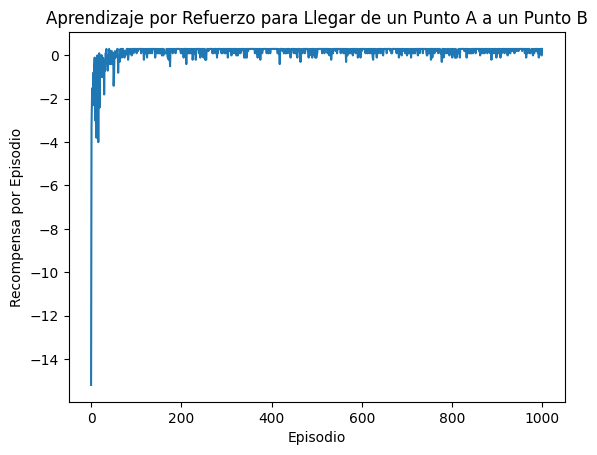

Camino tomado por el agente después del entrenamiento: [(0, 0), (0, 1), (0, 2), (1, 2), (1, 3), (2, 3), (3, 3), (3, 4), (4, 4)]


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Definir el entorno
class CustomEnvironment:
    def __init__(self, size=5):
        self.size = size
        self.state = (0, 0)
        self.goal = (size - 1, size - 1)

    def reset(self):
        self.state = (0, 0)
        return self.state

    def step(self, action):
        x, y = self.state

        if action == 0:  # Arriba
            x = max(0, x - 1)
        elif action == 1:  # Abajo
            x = min(self.size - 1, x + 1)
        elif action == 2:  # Izquierda
            y = max(0, y - 1)
        elif action == 3:  # Derecha
            y = min(self.size - 1, y + 1)

        self.state = (x, y)

        # Recompensa positiva si llegamos al objetivo, negativa en otros casos
        reward = 1 if self.state == self.goal else -0.1

        # Determinar si hemos llegado al objetivo
        done = self.state == self.goal

        return self.state, reward, done

# Q-learning para entrenar al agente en el entorno personalizado
def train_agent(env, num_episodes=1000, learning_rate=0.1, discount_factor=0.9, epsilon=0.1):
    Q = np.zeros((env.size, env.size, 4))  # Tabla Q para cada estado y acción
    rewards_per_episode = []

    for episode in range(num_episodes):
        state = env.reset()
        total_reward = 0

        while True:
            # Elegir acción utilizando epsilon-greedy
            if np.random.rand() < epsilon:
                action = np.random.randint(4)
            else:
                action = np.argmax(Q[state[0], state[1], :])

            next_state, reward, done = env.step(action)

            # Actualizar la tabla Q utilizando la ecuación de Q-learning
            Q[state[0], state[1], action] = (1 - learning_rate) * Q[state[0], state[1], action] + \
                                             learning_rate * (reward + discount_factor * np.max(Q[next_state[0], next_state[1], :]))

            total_reward += reward
            state = next_state

            if done:
                break

        rewards_per_episode.append(total_reward)

    return Q, rewards_per_episode

# Visualizar el camino tomado por el agente después del entrenamiento
def visualize_path(Q, env):
    state = env.reset()
    path = [state]

    while True:
        action = np.argmax(Q[state[0], state[1], :])
        next_state, _, done = env.step(action)
        path.append(next_state)
        state = next_state

        if done:
            break

    return path

# Crear y entrenar el agente
env = CustomEnvironment(size=5)
trained_Q, rewards = train_agent(env, num_episodes=1000)

# Visualizar el gráfico de recompensas por episodio
plt.plot(rewards)
plt.xlabel('Episodio')
plt.ylabel('Recompensa por Episodio')
plt.title('Aprendizaje por Refuerzo para Llegar de un Punto A a un Punto B')
plt.show()

# Visualizar el camino tomado por el agente después del entrenamiento
path_taken = visualize_path(trained_Q, env)
print("Camino tomado por el agente después del entrenamiento:", path_taken)


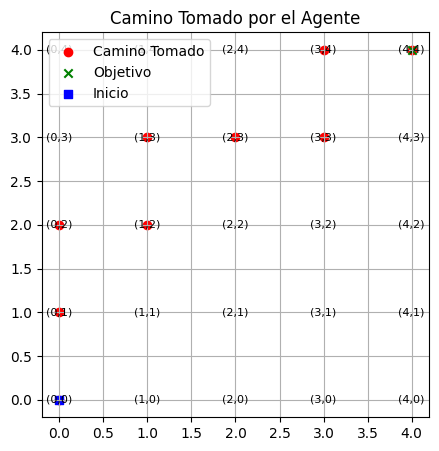

In [ ]:
# Visualizar el camino tomado en un diagrama
def plot_path(path, env_size):
    plt.figure(figsize=(env_size, env_size))
    plt.scatter(*zip(*path), color='red', marker='o', label='Camino Tomado')
    plt.scatter(*env.goal, color='green', marker='x', label='Objetivo')
    plt.scatter(*env.reset(), color='blue', marker='s', label='Inicio')

    for i in range(env_size):
        for j in range(env_size):
            plt.text(j, env_size - 1 - i, f'({j},{env_size-1-i})', ha='center', va='center', fontsize=8, color='black')

    plt.legend()
    plt.grid(True)
    plt.title('Camino Tomado por el Agente')
    plt.show()

# Visualizar el camino tomado por el agente en un diagrama
plot_path(path_taken, env.size)


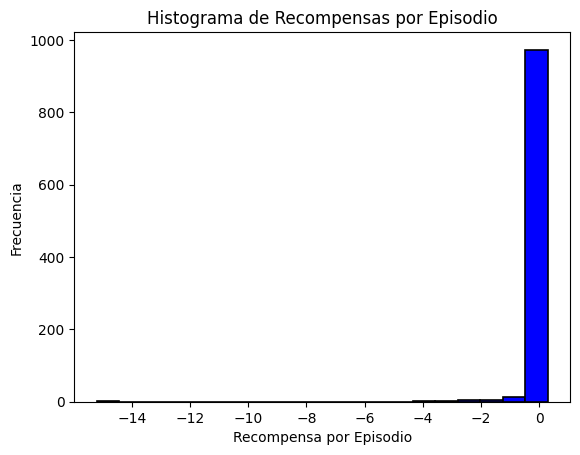

In [ ]:
average_reward = np.mean(rewards)

max_reward = np.max(rewards)
min_reward = np.min(rewards)

std_dev_reward = np.std(rewards)


plt.hist(rewards, bins=20, color='blue', edgecolor='black', linewidth=1.2)
plt.xlabel('Recompensa por Episodio')
plt.ylabel('Frecuencia')
plt.title('Histograma de Recompensas por Episodio')
plt.show()



Recompensa Promedio por Episodio: 0.14370000000000005
Recompensa Máxima: 0.30000000000000004
Recompensa Mínima: -15.19999999999996
Desviación Estándar de las Recompensas: 0.6052440086444465


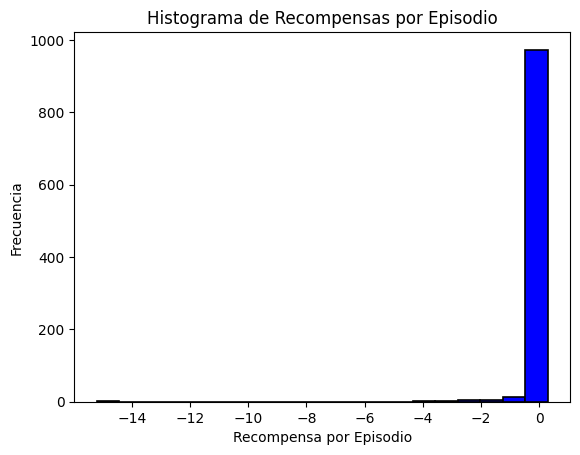

In [ ]:
# Calcular estadísticas de recompensas
average_reward = np.mean(rewards)
max_reward = np.max(rewards)
min_reward = np.min(rewards)
std_dev_reward = np.std(rewards)

# Imprimir estadísticas
print(f"Recompensa Promedio por Episodio: {average_reward}")
print(f"Recompensa Máxima: {max_reward}")
print(f"Recompensa Mínima: {min_reward}")
print(f"Desviación Estándar de las Recompensas: {std_dev_reward}")

# Histograma de Recompensas
plt.hist(rewards, bins=20, color='blue', edgecolor='black', linewidth=1.2)
plt.xlabel('Recompensa por Episodio')
plt.ylabel('Frecuencia')
plt.title('Histograma de Recompensas por Episodio')
plt.show()


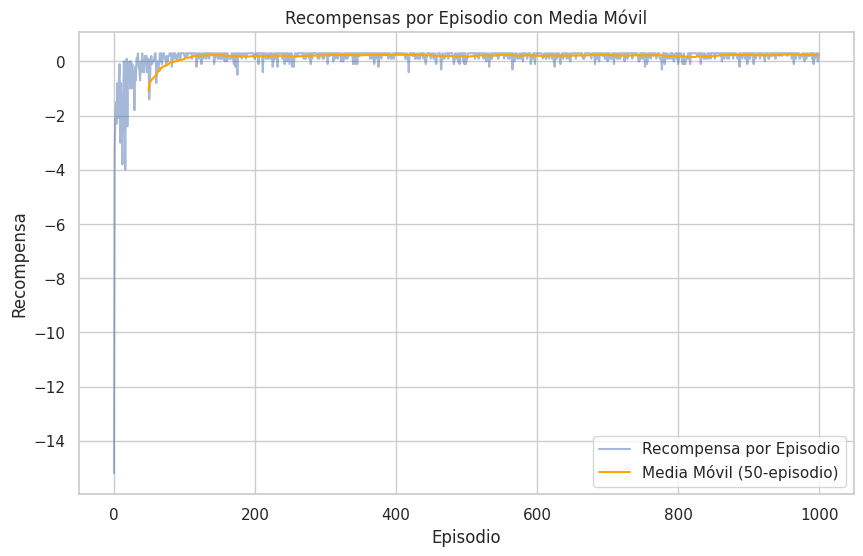

In [ ]:
import seaborn as sns

# Calcular la media móvil para suavizar la línea de recompensas
window_size = 50
rolling_average = np.convolve(rewards, np.ones(window_size)/window_size, mode='valid')

# Establecer el estilo de seaborn para gráficos más atractivos
sns.set(style="whitegrid")

# Crear un gráfico de línea con recompensas y suavizado
plt.figure(figsize=(10, 6))
plt.plot(rewards, alpha=0.5, label='Recompensa por Episodio')
plt.plot(np.arange(window_size - 1, len(rewards)), rolling_average, label=f'Media Móvil ({window_size}-episodio)', color='orange')

# Personalizar el gráfico
plt.xlabel('Episodio')
plt.ylabel('Recompensa')
plt.title('Recompensas por Episodio con Media Móvil')
plt.legend()
plt.show()
